# Seasonal snow assignment
Eric Gagliano, Seth Vanderwilt

CEWA 568 Final Project

## Teaching goals of this notebook

Analyze how snow accumulates and melts over the water year at a key study site, Paradise in Mount Rainier National Park.

## Instructions


**Questions are in bold.** Please fill in your answers to the questions in the markdown cells labeled *Your answer here*. 

## Importing code packages

In [1]:
# We'll use Metloom to quickly download a time series of measurements from our SNOTEL site
!pip install -q metloom

In [2]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from metloom.pointdata import SnotelPointData
from metloom.variables import SnotelVariables

## Downloading data from Water Year 2021 (October 1st 2020 - September 30th 2021)
* Read the description of the Paradise SNOTEL site on this page: https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=679


**1. Describe the location of this site. What is its elevation?**


*Your answer here*

In [3]:
snotel_point = SnotelPointData("679:WA:SNTL", "Paradise")

df = snotel_point.get_daily_data(
    datetime(2020, 10, 1), datetime(2021, 9, 30),
    [snotel_point.ALLOWED_VARIABLES.PRECIPITATION,
     snotel_point.ALLOWED_VARIABLES.PRECIPITATIONACCUM,
     snotel_point.ALLOWED_VARIABLES.SNOWDEPTH,
     snotel_point.ALLOWED_VARIABLES.SWE,
     snotel_point.ALLOWED_VARIABLES.TEMPAVG,
     snotel_point.ALLOWED_VARIABLES.TEMPMIN,
     snotel_point.ALLOWED_VARIABLES.TEMPMAX,
     snotel_point.ALLOWED_VARIABLES.SOILMOISTURE2IN
    ]
)

# Change the form of our resulting Pandas DataFrame
df.reset_index(inplace=True)
df.set_index("datetime", inplace=True)


df.head()

,site,geometry,PRECIPITATION,PRECIPITATION_units,ACCUMULATED PRECIPITATION,ACCUMULATED PRECIPITATION_units,SNOWDEPTH,SNOWDEPTH_units,SWE,SWE_units,AVG AIR TEMP,AVG AIR TEMP_units,MIN AIR TEMP,MIN AIR TEMP_units,MAX AIR TEMP,MAX AIR TEMP_units,SOIL MOISTURE -2IN,SOIL MOISTURE -2IN_units,datasource
datetime,,,,,,,,,,,,,,,,,,,
2020-10-01 08:00:00+00:00,679:WA:SNTL,POINT Z (-121.74765 46.78265 5130.00000),0.0,in,0.0,in,0.0,in,0.0,in,64.22,degF,60.08,degF,73.22,degF,2.6,pct,NRCS
2020-10-02 08:00:00+00:00,679:WA:SNTL,POINT Z (-121.74765 46.78265 5130.00000),0.0,in,0.0,in,0.0,in,0.0,in,61.88,degF,55.76,degF,70.70,degF,2.7,pct,NRCS
2020-10-03 08:00:00+00:00,679:WA:SNTL,POINT Z (-121.74765 46.78265 5130.00000),0.0,in,0.0,in,0.0,in,0.0,in,56.66,degF,48.20,degF,66.38,degF,2.8,pct,NRCS
2020-10-04 08:00:00+00:00,679:WA:SNTL,POINT Z (-121.74765 46.78265 5130.00000),0.0,in,0.0,in,0.0,in,0.0,in,50.18,degF,42.62,degF,59.00,degF,1.8,pct,NRCS
2020-10-05 08:00:00+00:00,679:WA:SNTL,POINT Z (-121.74765 46.78265 5130.00000),0.0,in,0.0,in,0.0,in,0.0,in,55.04,degF,44.60,degF,64.40,degF,2.5,pct,NRCS


**2. Which variables are measured by the sensors? What are their units?**

*Your answer here*

## Plotting SWE (snow water equivalent, the amount of liquid water contained in our snowpack per unit area) and other variables
* SWE is one of the key variables for snow hydrologists to track and estimate. If we have 10 inches of snow on the ground, that could melt down to 1 inch of water, or even 5 inches of water, depending on the snow density!
* By plotting several time series along the same x axis, we can get a better picture of what's going on at our site.

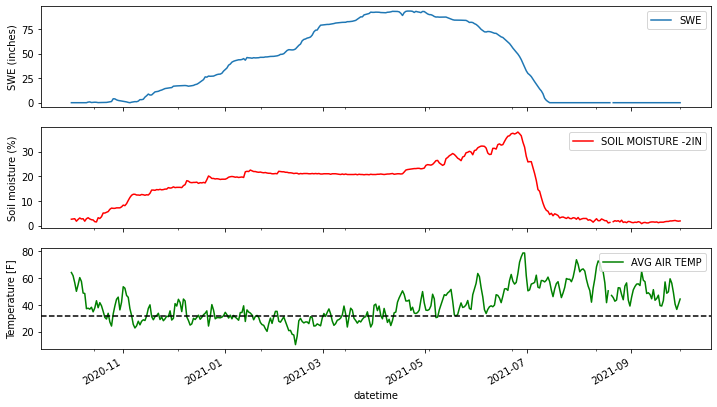

In [6]:
f,ax=plt.subplots(3,1,figsize=(12,7),sharex=True)
df["SWE"].plot(ax=ax[0])
ax[0].set_ylabel("SWE (inches)")
ax[1].set_ylabel("Soil moisture (%)")
ax[2].set_ylabel("Temperature [F]")
df["SOIL MOISTURE -2IN"].plot(ax=ax[1],color='red')
df["AVG AIR TEMP"].plot(ax=ax[2],color='green')
ax[2].axhline(y=32,color='black',linestyle='--')
for axs in ax:
    axs.legend(loc="upper right")

**3. What do you notice about the timing of SWE, soil moisture, and temperature? Is temperature important in determining melt timing?**

*Your answer here*

## Let's compare to our chart from the lecture, which is found at https://www.nrcs.usda.gov/Internet/WCIS/AWS_PLOTS/siteCharts/POR/WTEQ/WA/Paradise.html

**4. Did the peak occur earlier or later than other seasons in the last 30 years? Was it higher or lower?**

*Your answer here*

## Let's add in some remote sensing data. Check out the runoff onset map and select 2021: https://egagli.github.io/view_sar_snowmelt_timing_map/ 

**5. Zoom into the SNOTEL location coordinates, on the south slopes of Mount Rainier. What is the approximate calendar date of runoff onset for the closest areas that are ? (You should convert day of year to calendar date)**

*Your answer here*

**6. Would we expect date of runoff onset to happen at the same time as maximum SWE? Do they end up matching?**

*Your answer here*

## Now let's combine our snow data with some river measurements
* There is a stream gage on the Nisqually River downstream of Paradise, near the Longmire Wilderness Information Center (2700 feet). Take a look at the station information and status page here (as of June 2023, there is no new data being collected): https://waterdata.morageology.com/station.php?g=4B300A32
* We downloaded a CSV from https://waterdata.morageology.com/data.php?g=4B300A32
* As we can see below, we get several measurements that could give us some clues to what's happening in the watershed upstream...

In [7]:
downstream_df = pd.read_csv("longmire_wy2021.csv", parse_dates=True)

# A bit of reformatting for the date field
# What is GMT, and why do you think it's commonly used as the timestamp for measurements?
downstream_df["GMT Datetime"] = pd.to_datetime(downstream_df["GMT Datetime"])
downstream_df.set_index("GMT Datetime")

# Replace missing data values with not-a-number (NaN) to be consistent
downstream_df = downstream_df.replace(-999.9999, np.nan)
downstream_df = downstream_df.replace(-999.0, np.nan)
downstream_df = downstream_df.replace(999.9999, np.nan)

downstream_df.head()

,GMT Datetime,Local Datetime,Stage (ft),Rainfall (in),Turbidity (ntu),Air Temperature (°C),Dew Point Temperature (°C),Water Temperature (°C),Enclosure Temperature (°C),Turbidity Temperature (°C),10-hour Fuel Temperature (°C),Relative Humidity (%),Unnamed: 12,Water Conductivity (μS/cm),Air Level (ft),Water Level (psi),Battery (V)
0,2020-10-01 07:00:00,2020-10-01 00:00:00,1.0901,0.0,NaN,12.530,NaN,6.549,12.2,NaN,12.5,-99.0,NaN,12.629,30.926,13.855,13.2
1,2020-10-01 07:15:00,2020-10-01 00:15:00,1.1156,0.0,NaN,12.549,NaN,6.526,12.0,NaN,12.4,-99.0,NaN,12.612,30.926,13.866,13.2
2,2020-10-01 07:30:00,2020-10-01 00:30:00,1.0812,0.0,NaN,12.478,NaN,6.506,12.0,NaN,12.4,-99.0,NaN,12.604,30.928,13.852,13.2
3,2020-10-01 07:45:00,2020-10-01 00:45:00,1.0766,0.0,NaN,12.429,NaN,6.492,11.8,NaN,12.4,-99.0,NaN,12.601,30.928,13.850,13.2
4,2020-10-01 08:00:00,2020-10-01 01:00:00,1.0740,0.0,NaN,12.369,NaN,6.484,11.6,NaN,12.3,-99.0,NaN,12.624,30.926,13.848,13.2


## Plotting the water level over the year
In our case, we are only curious about the stage (height level) of the Nisqually River, and connecting this to what's happening relative to the snow at our Paradise site.

Text(0.5, 1.0, 'Nisqually River stage at Longmire')

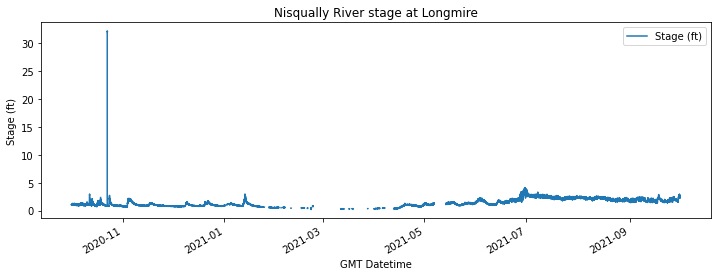

In [11]:
f,ax=plt.subplots(figsize=(12,4))
downstream_df.plot.line("GMT Datetime", "Stage (ft)",ax=ax)
plt.ylabel("Stage (ft)")
ax.set_title("Nisqually River stage at Longmire")

**7. Hmm... is that a plausible measurement of the stage in November? What would have happened in the park if that outlier was real?**

*Your answer here*

Let's plot again with the y axis range reduced so that we can see the rest of the data. Now we can see the rest of the time series more clearly.

Text(0.5, 1.0, 'Nisqually River stage at Longmire')

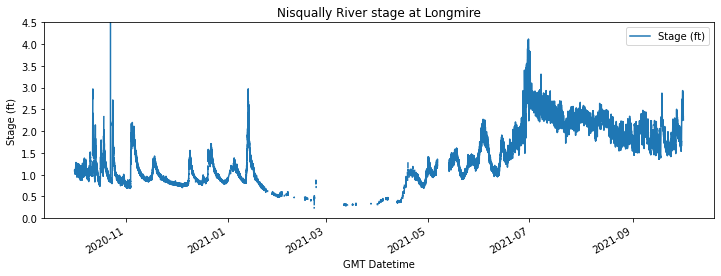

In [13]:
f,ax=plt.subplots(figsize=(12,4))
downstream_df.plot.line("GMT Datetime", "Stage (ft)",ax=ax)
plt.ylim(0,4.5)  # crop the y axis
plt.ylabel("Stage (ft)")
plt.title("Nisqually River stage at Longmire")

## Let's plot our two datasets together

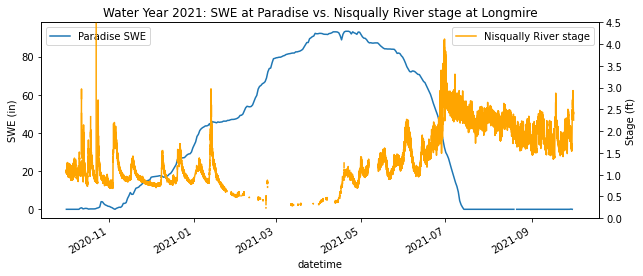

In [8]:
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(10,4))
ax0 = ax
df["SWE"].plot(ax=ax0, label="Paradise SWE")
ax0.set_ylabel("SWE (in)")
ax0.set_title("Water Year 2021: SWE at Paradise vs. Nisqually River stage at Longmire")
ax1 = ax0.twinx()
ax1.plot(downstream_df["GMT Datetime"], downstream_df["Stage (ft)"], color="orange", label="Nisqually River stage")
ax1.set_ylim(0, 4.5)
# ax1.set_title("Nisqually River stage at Longmire (downstream of Paradise)")
ax1.set_ylabel("Stage (ft)")
# axes[2].plot(downstream_df["GMT Datetime"], downstream_df["Water Temperature (°C)"])
ax0.legend(loc=2)
ax1.legend(loc=0)

**8. Zoom in on late October-November 2020. What does the Paradise SWE measurement tell us about the spikes in the river downstream? Which other variables would help us figure out what is going on here?**

*Your answer here*

**9. What's going on with this stream gage in the middle of the winter?**
* Hint: https://www.nps.gov/thingstodo/explore-longmire-in-winter.htm

*Your answer here*

## Transitioning to spring

**10. From the April 20th peak SWE for this year, to reaching 0, how long does the melt process take? Based on your understanding of the SNOTEL station and the areas higher on the mountain, can you comment on how this relates to the observed river stage over the summer?**

*Your answer here*

**(Bonus) Coding exercise: pick a smaller time period and plot the daily temperature range, precipitation, and SWE**

In [9]:
#Your answer here


## Wrapping up

**11. We found a maximum SWE of 93 inches at the Paradise SNOTEL station for 2021. All of this snow eventually melted and ended up somewhere. Based on your analysis in this assignment, where do you think the water went?**

*Your answer here*

**12. Let's say you were tasked to determine the average day of snowmelt in the Nisqually River Basin. What are the benefits of using each dataset: SNOTEL station SWE, SNOTEL station temperature, Nisqually streamgage, snowmelt map from a remote sensing satellite. Do you think combining datasets would lead to a more accurate prediction?**

*Your answer here*